# Double Mass Analysis

## Load Libraries

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Input Filename

In [41]:
filename = 'DoubleMass_Data'
filename += '.csv'

## Input Dataframe

In [42]:
input_data = pd.read_csv(filename, header = None)
input_data.head()

,0,1,2,3
0,692.2,744.3,569.2,979.1
1,552.2,602.0,460.1,787.2
2,512.7,549.6,426.9,737.9
3,414.1,446.6,322.5,589.4
4,616.3,658.4,512.2,867.9


## Stations Cumulative Measurements

In [43]:
cumsum_data = input_data.cumsum()
cumsum_data.head()

,0,1,2,3
0,692.2,744.3,569.2,979.1
1,1244.4,1346.3,1029.3,1766.3
2,1757.1,1895.9,1456.2,2504.2
3,2171.2,2342.5,1778.7,3093.6
4,2787.5,3000.9,2290.9,3961.5


## Average Cumulative

In [44]:
avg_data = pd.DataFrame()
avg_data.loc[:, 0] = input_data.mean(axis = 1)
avg_data.loc[:, 1] = avg_data.iloc[:,0].cumsum()
avg_data.head()

,0,1
0,746.200,746.200
1,600.375,1346.575
2,556.775,1903.350
3,443.150,2346.500
4,663.700,3010.200


## Preparing Canvas

In [45]:
plt.rcParams['figure.figsize'] = 12, 9
plt.rcParams['font.family'] = 'Franklin Gothic Medium Cond'
plt.style.use('ggplot')

## Plotting

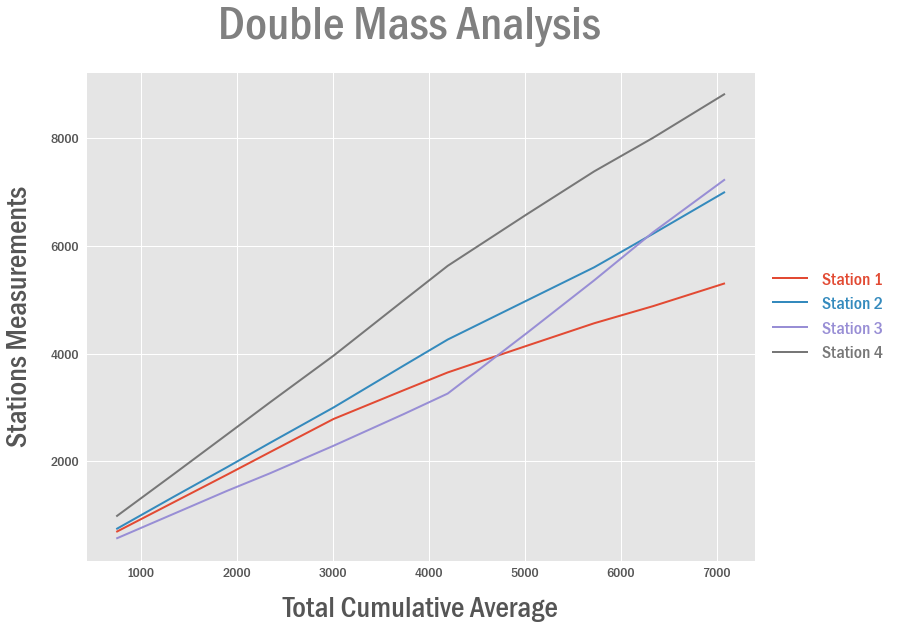

In [46]:
plt.suptitle('Double Mass Analysis', fontsize = '48', color = 'gray')
plt.xlabel('Total Cumulative Average', fontsize = '30', labelpad = 18)
plt.ylabel('Stations Measurements', fontsize = '30', labelpad = 18)

ax = plt.axes()

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

for station_index in range(len(input_data.columns)):
        plt.plot(avg_data.loc[:, 1], cumsum_data[station_index], 
                 label = 'Station ' + str(station_index + 1))
                
leg = plt.legend(prop = {'size':18}, loc = 'center left', bbox_to_anchor = (1, 0.5))

for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())

plt.savefig(filename[:-4] + '.png', bbox_inches='tight')
plt.show()